In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
## null values are present 

In [5]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

Loan_ID  :  614
Gender  :  3
Married  :  3
Dependents  :  5
Education  :  2
Self_Employed  :  3
ApplicantIncome  :  505
CoapplicantIncome  :  287
LoanAmount  :  204
Loan_Amount_Term  :  11
Credit_History  :  3
Property_Area  :  3
Loan_Status  :  2


In [6]:
df=df.drop('Loan_ID',axis=1)

In [7]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
value_count=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
for col in value_count.columns:
    print(col," : ",value_count[col].value_counts())

Gender  :  Male      489
Female    112
Name: Gender, dtype: int64
Married  :  Yes    398
No     213
Name: Married, dtype: int64
Dependents  :  0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education  :  Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed  :  No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term  :  360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Credit_History  :  1.0    475
0.0     89
Name: Credit_History, dtype: int64
Property_Area  :  Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status  :  Y    422
N    192
Name: Loan_Status, dtype: int64


In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
droooop = df.dropna()

In [11]:
droooop

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## more than 18% of data is lost when dropping all na values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [13]:
df.Loan_Status = pd.factorize(df.Loan_Status)[0]

In [14]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,0


In [15]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df=df.dropna(subset=['Married'])

In [17]:
df=df.dropna(subset=['Dependents'])

In [18]:
knni = KNNImputer(n_neighbors=2)
df[['LoanAmount','Loan_Amount_Term']] = knni.fit_transform(df[['LoanAmount','Loan_Amount_Term']])

In [19]:
df.LoanAmount.nunique()

204

In [20]:
df.Loan_Amount_Term.nunique()

12

In [21]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

Gender  :  3
Married  :  2
Dependents  :  4
Education  :  2
Self_Employed  :  3
ApplicantIncome  :  492
CoapplicantIncome  :  284
LoanAmount  :  204
Loan_Amount_Term  :  12
Credit_History  :  3
Property_Area  :  3
Loan_Status  :  2


In [22]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,97.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,0


In [23]:
df1=df

In [24]:
df1.Gender =df1.Gender.map({'Male':1,'Female':2})
df1.Self_Employed =df1.Self_Employed.map({'Yes':1,'No':2})

In [25]:
df['Self_Employed'].fillna(1,inplace=True)
df['Gender'].fillna(1,inplace=True)
df['Credit_History'].fillna(1,inplace=True)

In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
value_count=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
for col in value_count.columns:
    print(col," : ",value_count[col].value_counts())

Gender  :  1.0    490
2.0    109
Name: Gender, dtype: int64
Married  :  Yes    390
No     209
Name: Married, dtype: int64
Dependents  :  0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education  :  Graduate        469
Not Graduate    130
Name: Education, dtype: int64
Self_Employed  :  2.0    487
1.0    112
Name: Self_Employed, dtype: int64
Loan_Amount_Term  :  360.0    511
180.0     43
300.0     14
480.0     13
84.0       4
120.0      3
240.0      3
270.0      2
60.0       2
36.0       2
330.0      1
12.0       1
Name: Loan_Amount_Term, dtype: int64
Credit_History  :  1.0    515
0.0     84
Name: Credit_History, dtype: int64
Property_Area  :  Semiurban    227
Urban        195
Rural        177
Name: Property_Area, dtype: int64
Loan_Status  :  0    413
1    186
Name: Loan_Status, dtype: int64


In [28]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,Graduate,2.0,5849,0.0,97.0,360.0,1.0,Urban,0
1,1.0,Yes,1,Graduate,2.0,4583,1508.0,128.0,360.0,1.0,Rural,1
2,1.0,Yes,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,0
3,1.0,Yes,0,Not Graduate,2.0,2583,2358.0,120.0,360.0,1.0,Urban,0
4,1.0,No,0,Graduate,2.0,6000,0.0,141.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.0,No,0,Graduate,2.0,2900,0.0,71.0,360.0,1.0,Rural,0
610,1.0,Yes,3+,Graduate,2.0,4106,0.0,40.0,180.0,1.0,Rural,0
611,1.0,Yes,1,Graduate,2.0,8072,240.0,253.0,360.0,1.0,Urban,0
612,1.0,Yes,2,Graduate,2.0,7583,0.0,187.0,360.0,1.0,Urban,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    float64
 1   Married            599 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          599 non-null    object 
 4   Self_Employed      599 non-null    float64
 5   ApplicantIncome    599 non-null    int64  
 6   CoapplicantIncome  599 non-null    float64
 7   LoanAmount         599 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit_History     599 non-null    float64
 10  Property_Area      599 non-null    object 
 11  Loan_Status        599 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 60.8+ KB


## 0=male
## 1=Female

In [29]:
df =df.astype(str)

In [30]:
dummy = pd.get_dummies(df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']],drop_first=True)
df = pd.concat([df,dummy],axis='columns')

df=df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'],axis=1)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_2.0,Married_Yes,Education_Not Graduate,Self_Employed_2.0,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,97.0,360.0,1.0,0,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,0,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,1,0,0,1,0,0
610,3+,4106,0.0,40.0,180.0,1.0,0,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,0,1,0,1,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,0,1,0,1,0,1


In [31]:
df.Dependents = pd.factorize(df.Dependents)[0]

In [32]:
df.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [33]:
df =df.astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               599 non-null    float64
 1   ApplicantIncome          599 non-null    float64
 2   CoapplicantIncome        599 non-null    float64
 3   LoanAmount               599 non-null    float64
 4   Loan_Amount_Term         599 non-null    float64
 5   Credit_History           599 non-null    float64
 6   Loan_Status              599 non-null    float64
 7   Gender_2.0               599 non-null    float64
 8   Married_Yes              599 non-null    float64
 9   Education_Not Graduate   599 non-null    float64
 10  Self_Employed_2.0        599 non-null    float64
 11  Property_Area_Semiurban  599 non-null    float64
 12  Property_Area_Urban      599 non-null    float64
dtypes: float64(13)
memory usage: 65.5 KB


In [35]:
df.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_2.0                 0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_2.0          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [36]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_2.0,Married_Yes,Education_Not Graduate,Self_Employed_2.0,Property_Area_Semiurban,Property_Area_Urban
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.762938,5408.864775,1634.896361,145.315526,341.619366,0.859766,0.310518,0.181970,0.651085,0.217028,0.813022,0.378965,0.325543
std,1.015216,6168.473138,2953.144575,85.312576,64.363220,0.347520,0.463092,0.386142,0.477025,0.412567,0.390220,0.485535,0.468969
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2853.000000,0.000000,98.500000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3775.000000,1213.000000,125.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,5816.500000,2304.000000,165.500000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.skew()

Dependents                 0.978647
ApplicantIncome            6.505356
CoapplicantIncome          7.458603
LoanAmount                 2.707655
Loan_Amount_Term          -2.437935
Credit_History            -2.077417
Loan_Status                0.821077
Gender_2.0                 1.652736
Married_Yes               -0.635569
Education_Not Graduate     1.376358
Self_Employed_2.0         -1.609709
Property_Area_Semiurban    0.500234
Property_Area_Urban        0.746497
dtype: float64

<Axes: >

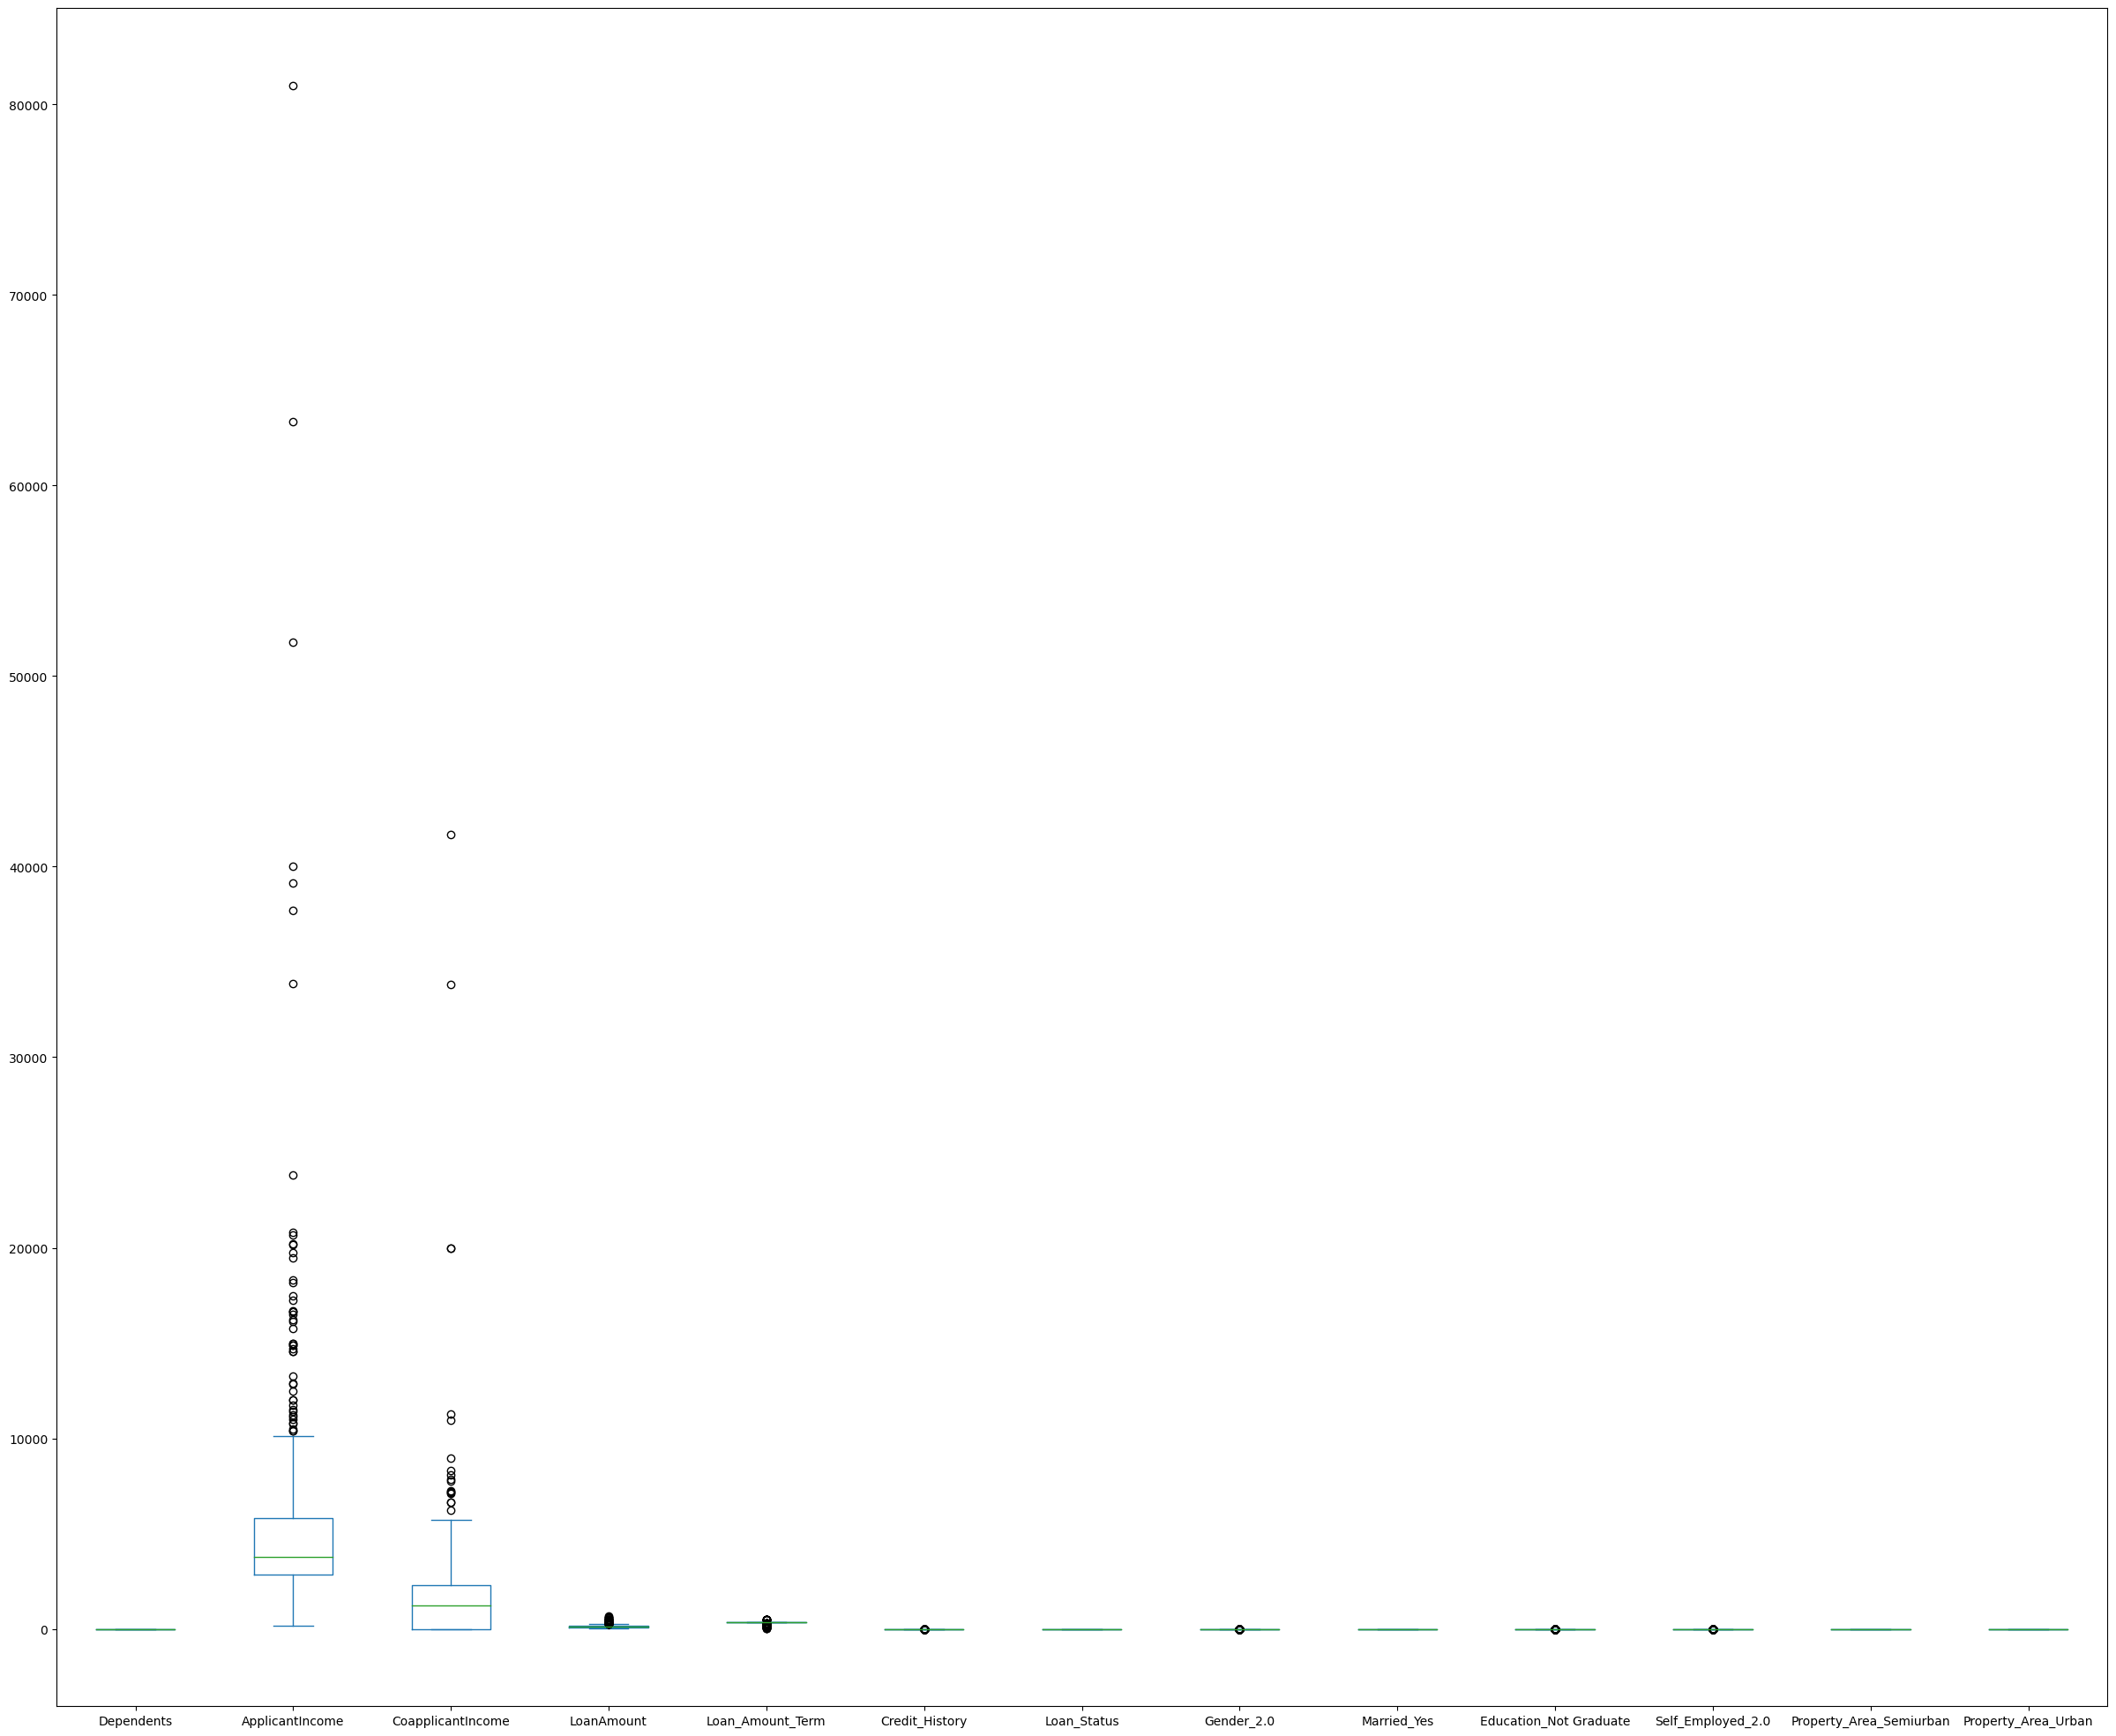

In [38]:
df.plot(kind='box',figsize=(30,25))

In [39]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_2.0,Married_Yes,Education_Not Graduate,Self_Employed_2.0,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849.0,0.0,97.0,360.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,4583.0,1508.0,128.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


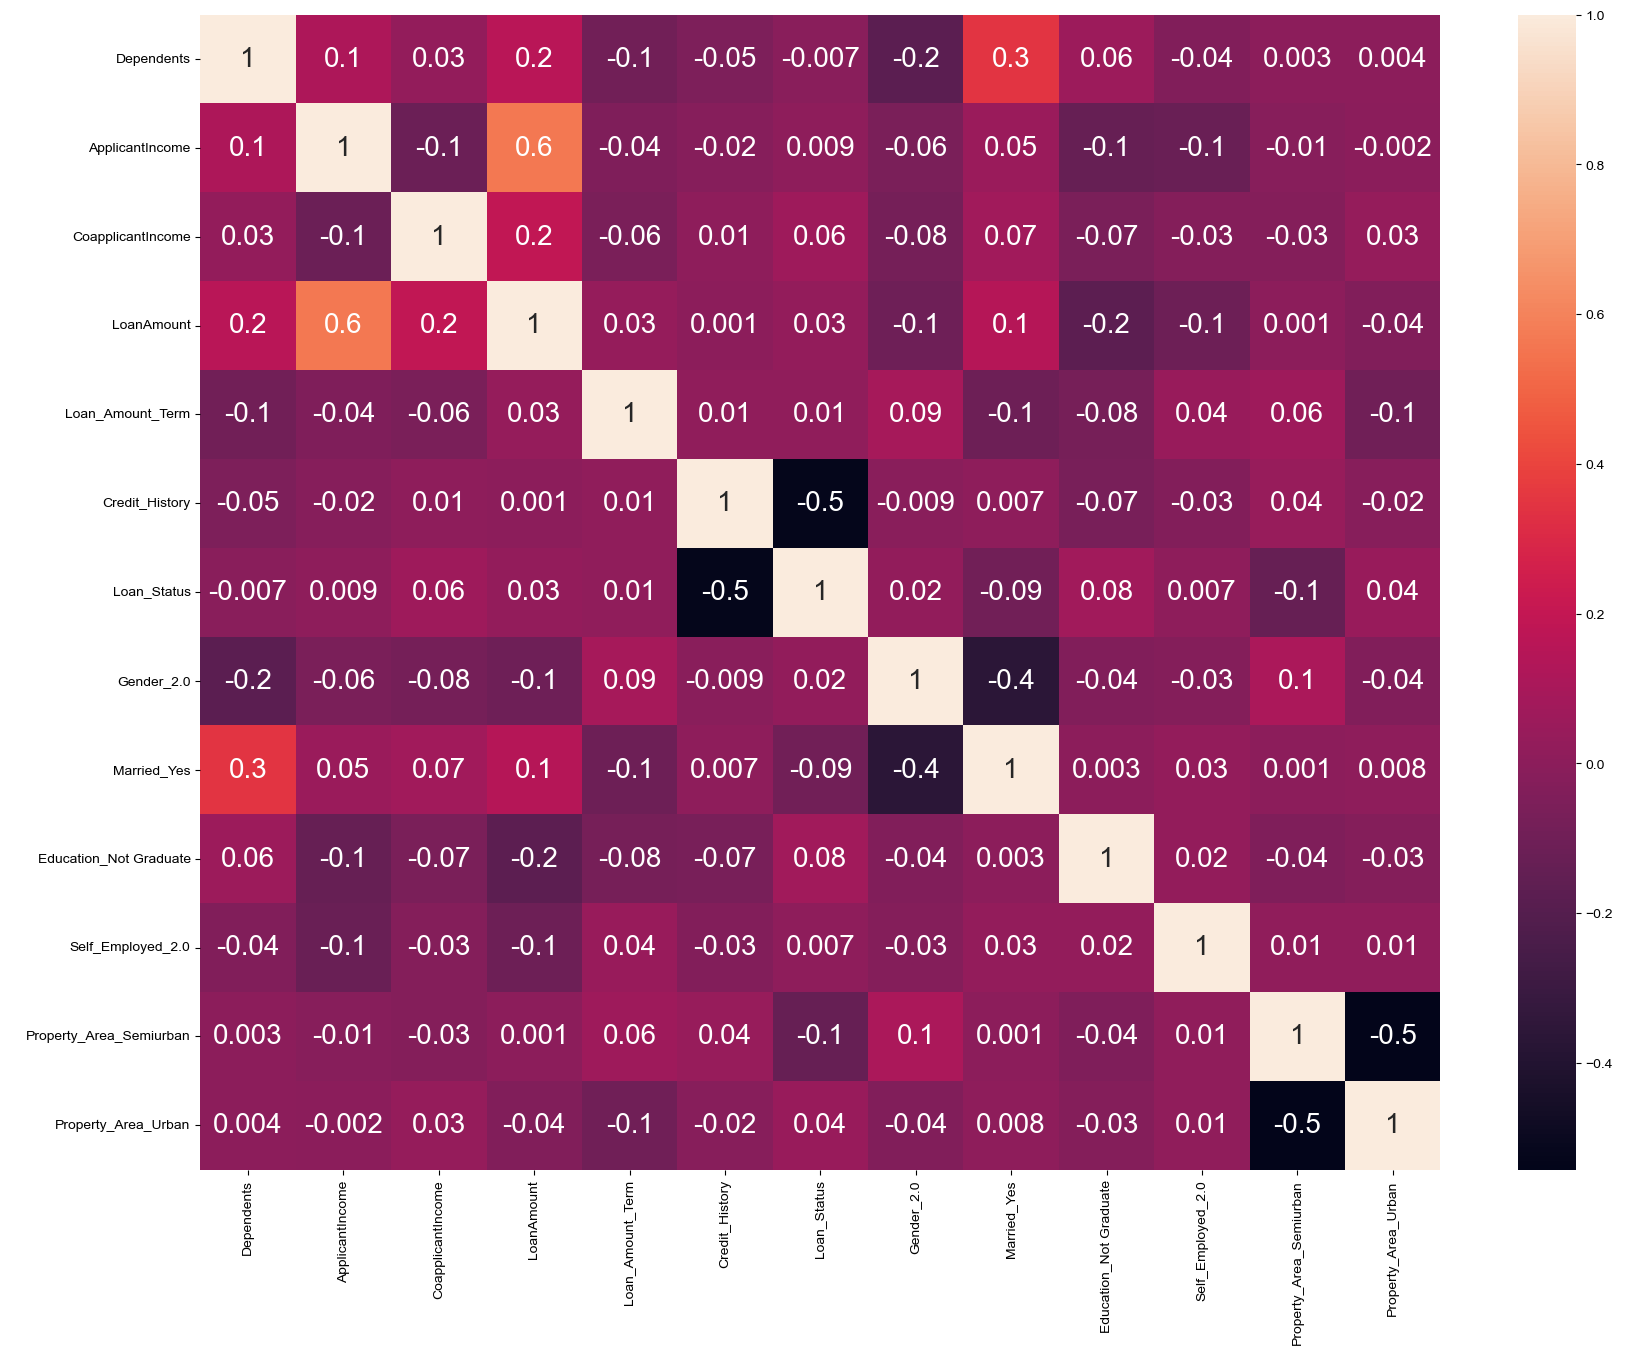

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})
sns.set(font_scale=3)

<Axes: ylabel='Loan_Status'>

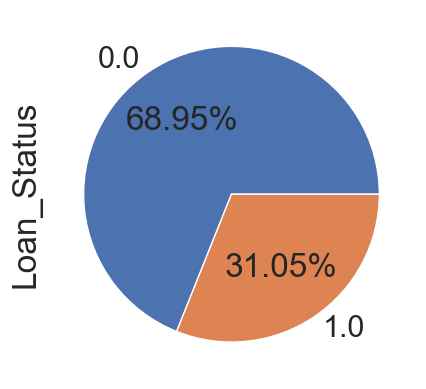

In [41]:
df['Loan_Status'].value_counts().plot.pie(autopct='%.2f%%')

In [49]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [56]:
y.value_counts()

0.0    413
1.0    186
Name: Loan_Status, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [59]:
y1.value_counts()

0.0    413
1.0    413
Name: Loan_Status, dtype: int64

.

In [78]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.20)

x_train_sca = x_train
x_test_sca = x_test

.

.

In [62]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print(accuracy_score(y_test,knny_pred))
print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

0.6506024096385542
              precision    recall  f1-score   support

         0.0       0.63      0.62      0.62        78
         1.0       0.67      0.68      0.67        88

    accuracy                           0.65       166
   macro avg       0.65      0.65      0.65       166
weighted avg       0.65      0.65      0.65       166

[0.65833333 0.625      0.64166667 0.60833333 0.61344538]
0.6293557422969187
difference 0.021246667341635495


In [63]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

0.8493975903614458
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85        78
         1.0       0.90      0.81      0.85        88

    accuracy                           0.85       166
   macro avg       0.85      0.85      0.85       166
weighted avg       0.85      0.85      0.85       166

[0.775      0.775      0.76666667 0.85       0.76470588]
0.7862745098039217
difference 0.06312308055752414


In [64]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

0.7409638554216867
              precision    recall  f1-score   support

         0.0       0.65      0.95      0.77        78
         1.0       0.92      0.56      0.70        88

    accuracy                           0.74       166
   macro avg       0.79      0.75      0.73       166
weighted avg       0.80      0.74      0.73       166

[0.79166667 0.75833333 0.74166667 0.84166667 0.79831933]
0.7863305322128852
difference -0.045366676791198435


In [106]:
rfc= RandomForestClassifier(max_depth= 10, max_features= 5, min_samples_split= 4, n_estimators= 300)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

0.8554216867469879
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        78
         1.0       0.94      0.77      0.85        88

    accuracy                           0.86       166
   macro avg       0.87      0.86      0.86       166
weighted avg       0.87      0.86      0.85       166

[0.79166667 0.78333333 0.75833333 0.83333333 0.80672269]
0.7946778711484594
difference 0.06074381559852848
[[74  4]
 [20 68]]


In [67]:
rfc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'min_samples_split':[4,8,16,24],
            'n_estimators':[100,200,300,400,500]}
clf = GridSearchCV(rfc, rfc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.8484848484848484
{'max_depth': 10, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 300}


In [68]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sca,y_train)
gbcy_pred = gbc.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

0.8493975903614458
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86        78
         1.0       0.96      0.75      0.84        88

    accuracy                           0.85       166
   macro avg       0.86      0.86      0.85       166
weighted avg       0.87      0.85      0.85       166

[0.775      0.74166667 0.775      0.81666667 0.7394958 ]
0.7695658263305323
difference 0.07983176403091352


In [69]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

0.8433734939759037
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85        78
         1.0       0.92      0.77      0.84        88

    accuracy                           0.84       166
   macro avg       0.85      0.85      0.84       166
weighted avg       0.85      0.84      0.84       166

[0.75833333 0.775      0.775      0.81666667 0.78991597]
0.7829831932773109
difference 0.06039030069859275


In [70]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76        78
         1.0       0.82      0.70      0.76        88

    accuracy                           0.76       166
   macro avg       0.76      0.76      0.76       166
weighted avg       0.77      0.76      0.76       166

[0.80833333 0.76666667 0.775      0.86666667 0.78991597]
0.8013165266106442
difference -0.042280382032330976


In [71]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

0.7530120481927711
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74        78
         1.0       0.77      0.76      0.77        88

    accuracy                           0.75       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.75      0.75      0.75       166

[0.70833333 0.725      0.64166667 0.75833333 0.73109244]
0.7128851540616247
difference 0.04012689413114645


In [72]:
model= SVC()
model.fit(x_train_sca,y_train)
modely_pred = model.predict(x_test_sca)

print(accuracy_score(y_test,modely_pred))
print(classification_report(y_test,modely_pred))

recheck = cross_val_score(model,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,modely_pred) - recheck.mean())

0.5301204819277109
              precision    recall  f1-score   support

         0.0       0.50      0.64      0.56        78
         1.0       0.58      0.43      0.49        88

    accuracy                           0.53       166
   macro avg       0.54      0.54      0.53       166
weighted avg       0.54      0.53      0.53       166

[0.69166667 0.69166667 0.69166667 0.68333333 0.68907563]
0.689481792717087
difference -0.1593613107893761


In [76]:
abc = AdaBoostClassifier(base_estimator=rfc)
abc.fit(x_train_sca,y_train)
abcy_pred= abc.predict(x_test_sca)
print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

0.8734939759036144
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88        78
         1.0       0.96      0.80      0.87        88

    accuracy                           0.87       166
   macro avg       0.88      0.88      0.87       166
weighted avg       0.89      0.87      0.87       166

[0.8        0.775      0.75833333 0.80833333 0.78151261]
0.7846358543417367
difference 0.08885812156187778


## rfc= RandomForestClassifier and abc = AdaBoostClassifier(base_estimator=rfc) are best performing models

.

In [ ]:
import joblib
joblib.dump(rfc,'bestmodel.obj')

,